In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Import libraries
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


### Data Description

This project uses three datasets:

#### `train_data.csv`: 
This dataset contains two years (2022 & 2023) of historical transactions for 100,000 Carrefour customers. It has 10 columns:

* ***date***: Date of the transaction
* ***transaction_id***: ID of the transaction
* ***customer_id***: Customer ID
* ***product_id***: Product purchased
* ***has_loyality_card***: Flag indicating whether the customer has a loyalty card
* ***store_id***: Store where the purchase was made
* ***is_promo***: Flag indicating whether there was a discount on the product
* ***quantity***: Quantity purchased of the product
* ***format***: Ecommerce activity format (clcv, lex, or DRIVE)
  - clcv : courses livrées chez vous
  - lex : livraison express
  - DRIVE.
* ***orderChannelCode***: Indicates whether the online activity was made through the website or mobile app

#### `products_data.csv`: 
This dataset contains detailed information about the products. The following columns are relevant to this project:

* ***product_id*** : Product name
* ***product_description*** : Product description
* ***department_key***: Department key
* ***class_key***: Class key
* ***subclass_key***: Subclass key
* ***sector***: sector name
* ***brand_key***: Brand name
* ***shelf_level1***: Top-level shelf category
* ***shelf_level2***: Second-level shelf category
* ***shelf_level3***: Third-level shelf category
* ***shelf_level4***: Fourth-level shelf category
* ***sector***: Sector
* ***bio***: Flag indicating whether the product is organic
* ***sugar_free***: Flag indicating whether the product is sugar-free
* ***aspartame_free***: Flag indicating whether the product is aspartame-free
* ***gluten_free***: Flag indicating whether the product is gluten-free
* ***halal***: Flag indicating whether the product is halal
* ***casher***: Flag indicating whether the product is kosher
* ***eco_friendly***: Flag indicating whether the product is eco-friendly
* ***local_french***: Flag indicating whether the product is locally produced in France
* ***artificial_coloring_free***: Flag indicating whether the product is free of artificial coloring
* ***taste_enhancer_free***: Flag indicating whether the product is free of taste enhancers
* ***naturality***: Naturality score
* ***antibiotic_free***: Flag indicating whether the product is antibiotic-free
* ***reduced_sugar***: Flag indicating whether the product has reduced sugar content
* ***vegetarian***: Flag indicating whether the product is vegetarian
* ***pesticide_free***: Flag indicating whether the product is pesticide-free
* ***grain_free***: Flag indicating whether the product is grain-free
* ***no_added_sugar***: Flag indicating whether the product has no added sugar
* ***salt_reduced***: Flag indicating whether the product has reduced salt content
* ***nitrite_free***: Flag indicating whether the product is nitrite-free
* ***fed_without_ogm***: Flag indicating whether the animals were fed without GMOs
* ***no_added_salt***: Flag indicating whether the product has no added salt
* ***no_artificial_flavours***: Flag indicating whether the product has no artificial flavors
* ***porc***: Flag indicating whether the product contains pork
* ***vegan***: Flag indicating whether the product is vegan
* ***frozen***: Flag indicating whether the product is frozen
* ***fat_free***: Flag indicating whether the product is fat-free
* ***reduced_fats***: Flag indicating whether the product has reduced fat content
* ***fresh***: Flag indicating whether the product is fresh
* ***alcool***: Flag indicating whether the product contains alcohol
* ***lactose_free***: Flag indicating whether the product is lactose-free
* ***phenylalanine_free***: Flag indicating whether the product is phenylalanine-free
* ***palm_oil_free***: Flag indicating whether the product is palm oil-free
* ***ecoscore***: Ecoscore
* ***produits_du_monde***: Flag indicating whether the product is an international product
* ***regional_product***: Flag indicating whether the product is a regional product
* ***national_brand***: Flag indicating whether the product is a national brand
* ***first_price_brand***: Flag indicating whether the product is a first-price brand
* ***carrefour_brand***: Flag indicating whether the product is a Carrefour brand

#### `test_data.csv`: 
This dataset contains the actual purchases of the first 80,000 customers in 2024. It has three columns:

* ***transaction_id***: ID of the transaction
* ***customer_id***: Customer ID
* ***product_id***: the id of the purchased product

### Load data

* Load *train_data.csv*, *products_data.csv* and *test_data.csv* using pandas.

In [4]:
# This code reads the data from CSV files named "train_data_part_i.csv" for all i from 1 to 10
# and concatenates them into a single pandas DataFrame
train_dataframes = []
for i in tqdm(range(1, 11)):
    train_dataframes.append(pd.read_csv(f'data-train/train_data_part_{i}.csv'))
train_data = pd.concat(train_dataframes, ignore_index=True)

# free up memory by deleting the dataframes we no longer need
del train_dataframes

100%|██████████| 10/10 [03:56<00:00, 23.62s/it]


In [5]:
# This code reads the data from a CSV file named "products_data.csv" into a pandas DataFrame
products_data = pd.read_csv('data-train/products_data.csv')

/var/folders/1q/flvgnjd93t54mm7bg1pvvm1h0000gn/T/ipykernel_59739/1971356203.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  products_data = pd.read_csv('data-train/products_data.csv')


In [6]:
# This code reads the data from a CSV file named "test_data.csv" into a pandas DataFrame
test_data = pd.read_csv('data-train/test_data.csv')

In [7]:
train_data.sample(5)

,date,transaction_id,customer_id,product_id,has_loyality_card,store_id,is_promo,quantity,format,order_channel
40586801,2022-07-22,Transaction_1002949,Household_45994,Product_29658,0,Store_1085,0,2.0,DRIVE,WEBSITE
33842231,2023-06-10,Transaction_1294932,Household_39952,Product_7631,0,Store_17,0,1.0,DRIVE,WEBSITE
80003900,2023-12-14,Transaction_315452,Household_97261,Product_14447,1,Store_1895,0,1.0,DRIVE,MOBILE_APP
77249436,2022-04-10,Transaction_377931,Household_88716,Product_37906,0,Store_1160,0,2.0,DRIVE,WEBSITE
13261576,2023-03-03,Transaction_251867,Household_15800,Product_62013,0,Store_54,1,2.0,CLCV,MOBILE_APP


In [27]:
products_data.sample(10)

,product_id,product_description,department_key,class_key,subclass_key,sector,brand_key,shelf_level1,shelf_level2,shelf_level3,shelf_level4,bio,sugar_free,aspartame_free,gluten_free,halal,casher,eco_friendly,local_french,artificial_coloring_free,taste_enhancer_free,naturality,antibiotic_free,reduced_sugar,vegetarian,pesticide_free,grain_free,no_added_sugar,salt_reduced,nitrite_free,fed_without_ogm,no_added_salt,no_artificial_flavours,porc,vegan,frozen,fat_free,reduced_fats,fresh,alcool,lactose_free,phenylalanine_free,palm_oil_free,ecoscore,produits_du_monde,regional_product,national_brand,first_price_brand,carrefour_brand
0,Product_33508,PET 1L LORINA TONIC ARTISANAL,Department_10,Class_1000,SubClass_10000,PGC,LORINA,Boissons,"Colas, Thés glacés, Sirops et Sodas","Limonades, Limes et Tonics",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0
1,Product_15347,"1,5L LIMO PLANCOET",Department_10,Class_1000,SubClass_10000,PGC,PLANCOET,Boissons,"Colas, Thés glacés, Sirops et Sodas","Limonades, Limes et Tonics",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,1,0,0
2,Product_80604,"PET 1,5L LIMONADE SIMPL",Department_10,Class_1000,SubClass_10000,PGC,SIMPL,Boissons,"Colas, Thés glacés, Sirops et Sodas","Limonades, Limes et Tonics",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0
3,Product_81740,PET 1.5L LIMONADE LIGHT OGEU,Department_10,Class_1000,SubClass_10000,PGC,OGEU,Boissons,"Colas, Thés glacés, Sirops et Sodas","Limonades, Limes et Tonics",NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,1,0,0
4,Product_82516,1L LIMONADE ARTISANAL LORINA,Department_10,Class_1000,SubClass_10000,PGC,LORINA,Boissons,"Colas, Thés glacés, Sirops et Sodas","Limonades, Limes et Tonics",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82961,Product_18949,857699 BONNET POLAIRE NOIR TU,Department_66,Class_6620,SubClass_66204,TEXTILE,TEX,Mode et Bagagerie,Bagagerie et Maroquinerie,Accessoires de mode,"Chapeaux, Casquettes et Bonnets",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1
82962,Product_66524,857699 BONNET PO BLANC CAS2 TU,Department_66,Class_6620,SubClass_66204,TEXTILE,TEX,Mode et Bagagerie,Bagagerie et Maroquinerie,Accessoires de mode,"Chapeaux, Casquettes et Bonnets",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1
82963,Product_66126,876946 PULL DE NOEL PET ECRU S,Department_66,Class_6635,SubClass_66358,TEXTILE,TEX,Animalerie,Chiens,"Colliers, Laisses et Vêtements",Vêtements et Chaussures,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1
82964,Product_31161,CHARGE BUT 13K CRF,Department_75,Class_7520,SubClass_75201,ACTIVITES PERIPHERIQUES,CARREFOUR,Maison et Décoration,Bouteilles de gaz,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1


python(65831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


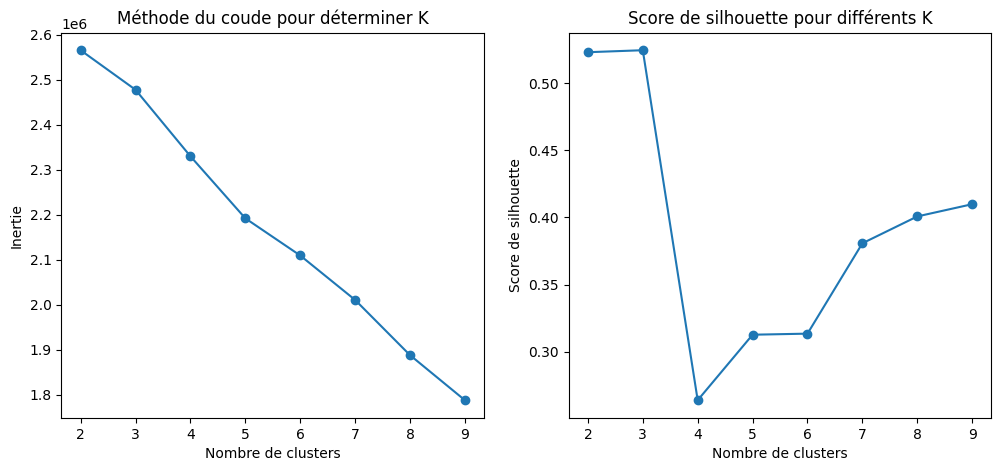

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Sélection automatique des colonnes binaires
binary_columns = [col for col in products_data.columns if products_data[col].nunique() == 2]

# On conserve uniquement ces colonnes binaires dans un nouveau DataFrame
products_data_binary = pd.DataFrame(products_data[binary_columns])

# Standardisation des données
scaler = StandardScaler()
products_data_binary_scaled = scaler.fit_transform(products_data_binary)

# Choisir le nombre optimal de clusters avec la méthode du coude
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)  # Essaye différents nombres de clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(products_data_binary_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(products_data_binary_scaled, kmeans.labels_))

# Visualisation de la méthode du coude et du score de silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title("Méthode du coude pour déterminer K")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Score de silhouette pour différents K")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")

plt.show()

# Choisir le nombre optimal de clusters basé sur les graphiques ci-dessus
optimal_k = 4  # Remplace par la valeur optimale

# Appliquer K-Means avec le nombre de clusters optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(products_data_binary_scaled)
products_data["cluster"] = kmeans.labels_  # Ajoute la colonne des clusters au DataFrame original


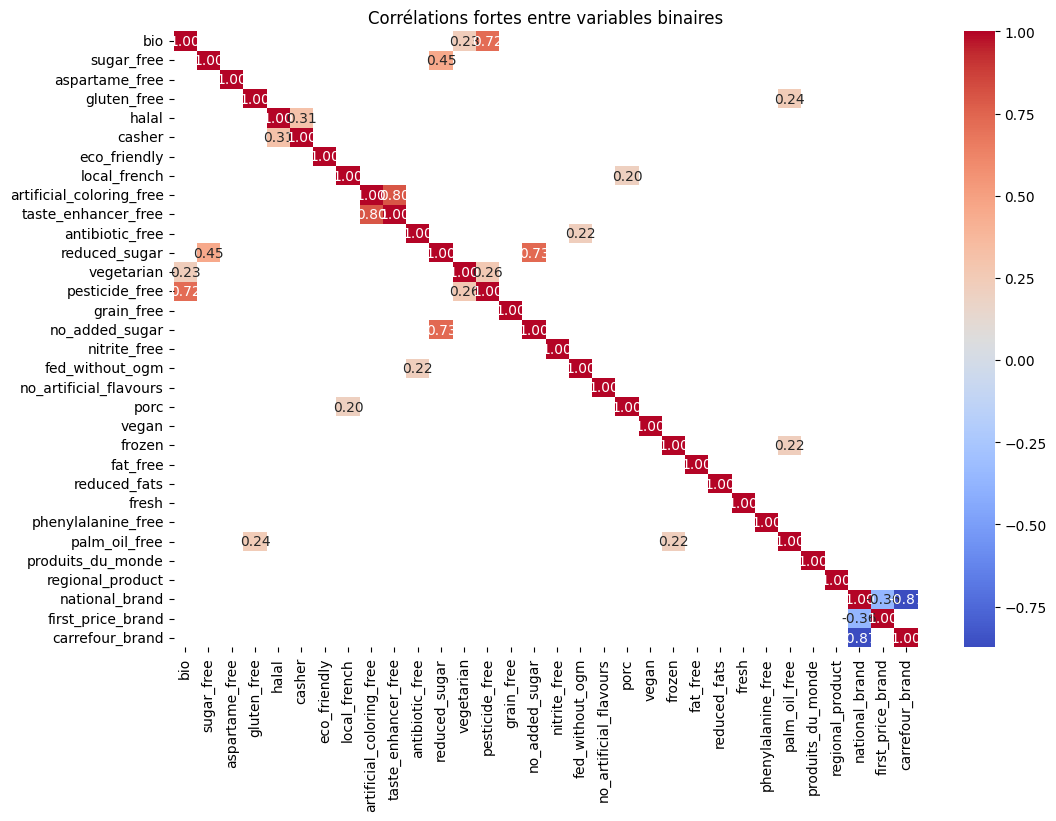

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt


# Calcul des corrélations et filtrage des corrélations fortes
corr_matrix = products_data[binary_columns].corr()
high_corr = corr_matrix[(corr_matrix >= 0.2) | (corr_matrix <= -0.2)]

# Affichage de la heatmap avec les corrélations significatives seulement
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélations fortes entre variables binaires")
plt.show()


In [22]:
test_data.sample(3)

,transaction_id,customer_id,product_id
848796,Transaction_2024_54002,Household_6885,Product_29976
1054922,Transaction_2024_34340,Household_47492,Product_9633
1181928,Transaction_2024_52821,Household_72387,Product_13788


## Create baseline frequency approach

### Create frequency dataframe

In [10]:
# Create a new DataFrame with customer_id, product_id, and count
frequency_df = train_data.groupby(['customer_id', 'product_id'])['transaction_id'].count().reset_index(name='frequency')
frequency_df.sample(4)

,customer_id,product_id,frequency
2572961,Household_16871,Product_31002,4
22194717,Household_696,Product_46905,3
9239501,Household_34801,Product_47518,1
5482885,Household_24694,Product_49122,2


In [11]:
# Rank the frequency for each customer in descending order
frequency_df['rank'] = frequency_df.groupby('customer_id')['frequency'].rank(ascending=False, method="first").astype("Int64")

### Explore results

Let's see the top 10 most purchased products bought by Household_1 in 2022 and 2023.

In [12]:
frequency_df[frequency_df.customer_id == "Household_1"].sort_values(by = "rank").head(10)

,customer_id,product_id,frequency,rank
347,Household_1,Product_57942,12,1
390,Household_1,Product_64067,11,2
421,Household_1,Product_67459,10,3
504,Household_1,Product_7783,8,4
97,Household_1,Product_21613,7,5
116,Household_1,Product_24334,7,6
541,Household_1,Product_833,7,7
440,Household_1,Product_7006,6,8
6,Household_1,Product_1128,5,9
54,Household_1,Product_170,5,10


And let's see what he actually bought in 2024

In [13]:
test_data[test_data.customer_id == "Household_1"]

,transaction_id,customer_id,product_id
69457,Transaction_2024_17216,Household_1,Product_45719
69458,Transaction_2024_17216,Household_1,Product_170
69459,Transaction_2024_17216,Household_1,Product_24334
69460,Transaction_2024_17216,Household_1,Product_64067
407363,Transaction_2024_17216,Household_1,Product_35730
407364,Transaction_2024_17216,Household_1,Product_57011
407365,Transaction_2024_17216,Household_1,Product_57942
407366,Transaction_2024_17216,Household_1,Product_73323
813971,Transaction_2024_17216,Household_1,Product_66850
813972,Transaction_2024_17216,Household_1,Product_49682


As you can see here $4$ out of $10$ most frequently purchased products by *Household_1* were re-purchased again by him during his first purchase of 2024 

 Create output file (only 10 recommendations per customer)

In [14]:
# Here we keep only the top 10 recommendation and we drop the frequency as it will not be used in later steps
top_10_recommendations = frequency_df[frequency_df['rank'] <= 10].drop(columns = "frequency") 

In [15]:
# show the top 10 recommendations for customer Household_1 and Household_2

top_10_recommendations[top_10_recommendations.customer_id.isin(["Household_1", "Household_2"])].sort_values(by = ["customer_id", "rank"])

,customer_id,product_id,rank
347,Household_1,Product_57942,1
390,Household_1,Product_64067,2
421,Household_1,Product_67459,3
504,Household_1,Product_7783,4
97,Household_1,Product_21613,5
116,Household_1,Product_24334,6
541,Household_1,Product_833,7
440,Household_1,Product_7006,8
6,Household_1,Product_1128,9
54,Household_1,Product_170,10


### Evaluate frequency model on whole test data using hitrate@10

The aim here is to assess how relevant our 10 product recommendations are. To do this, we calculate the percentage of these recommendations that are actually purchased by the customer.

In order to be precise, we describe here the formula for the computation of the score **hitrate@10**.
Let us introduce two vectors:
+ $(a_i)_{1 \le i \le N}$ with $N \in \mathbb{N}^*$ the products purchased by a customer during an order,
+ $(y_i)_{1 \le i \le 10}$ the $10$ predicted products.

Let us remark that $N$ is not necessarily equal to $10$. Then we have the following formula:


$$HitRate@K(a,y) = \frac{1}{\min(N,10)}\sum_{i=1}^{10} \mathbb{1}_{y_i \in \{a_1,...,a_N\}}$$

Let us provide several remarks:
+ We divide by $\min(N,10)$ in order to have a perfect score $1$ when the customer buys less than $10$ products and all these products are predicted.
+ This definition implicitly assumes that all $y_1,...,y_{10}$ are distinct. If some values are identical, the result can be distorted: for example, if the same product is entered $10$ times and this product is purchased, then the score is $1$. In order to avoid such a case, we ask you to have $10$ different products in your prediction. 
+ For the private and public score on kaggle, the rank is not taken into account. Nevertheless, we may use the score   **hitrate@K** for $K<10$ after the competition to decide between possible very close groups. So we ask you to give for each product a rank between $1$ and $10$ (i.e. a permutation of $\{1,...,10\}$).

In [17]:
# Hitrate@10 evaluation function

def hitrate_at_k(true_data: pd.DataFrame,
                 predicted_data: pd.DataFrame,
                 k: int = 10) -> float:
    """
    This function calculates the hitrate at k for the recommendations.
    It assesses how relevant our 10 product recommendations are.
    In other words, it calculates the proportion of recommended products that are actually purchased by the customer.

    Args:
        true_data: a pandas DataFrame containing the true data
            customer_id: the customer identifier
            product_id: the product identifier that was purchased in the test set
        predicted_data: a pandas DataFrame containing the predicted data
            customer_id: the customer identifier
            product_id: the product identifier that was recommended
            rank: the rank of the recommendation. the rank should be between 1 and 10.
        k: the number of recommendations to consider. k should be between 1 and 10.
    
    Returns:
        The hitrate at k
    """
    
    data = pd.merge(left = true_data, right = predicted_data, how = "left", on = ["customer_id", "product_id"])
    df = data[data["rank"] <= k]
    non_null_counts = df.groupby('customer_id')['rank'].apply(lambda x: x.notna().sum()).reset_index(name='non_null_count')
    distinct_products_per_customer = data.groupby('customer_id')['product_id'].nunique().reset_index(name='distinct_product_count')
    df = pd.merge(left = distinct_products_per_customer, right = non_null_counts, how = "left", on = "customer_id")
    df["denominator"] = [min(df.iloc[i].distinct_product_count,k) for i in range(len(df))]
    df = df.fillna(0)
    return (df["non_null_count"]/df["denominator"]).mean()

In [18]:
# Calculate the hitrate at k for k = 10
frequency_model_hitrate_at_10 = hitrate_at_k(test_data,top_10_recommendations,10)
print(f"Hitrate@10 for the frequency model is {frequency_model_hitrate_at_10:.2f}")

Hitrate@10 for the frequency model is 0.33


# Create submission file 

The goal of this part is to provide a function that allows you to encode your prediction in a format that is readable by kaggle when you submit it. In particular, this function checks that you have 10 distinct products per customer and that the ranks are some distinct integers between 1 to 10.

In [19]:
# Create submission file for 

# Keep only the top 10 recommendations for Households between 80001 and 100000
prediction = top_10_recommendations[
    top_10_recommendations.customer_id.isin(
            [
                f"Household_{i}" for i in range(80001,100001)
            ]
        )
    ]

# Print the solution
prediction.head()

,customer_id,product_id,rank
1851,Household_100000,Product_23631,3
1862,Household_100000,Product_27977,7
1868,Household_100000,Product_31642,1
1871,Household_100000,Product_32874,10
1921,Household_100000,Product_5237,8


In [20]:
def process_and_format_prediction(df):
    # Remplacement des caractères invalides dans les noms de colonnes
    df.columns = df.columns.str.replace('+AF8-', '_', regex=False)
    df = df.replace(r'\+AF8-', '_', regex=True)

    # Nettoyage des colonnes 'customer_id', 'product_id', et 'transaction_id'
    if 'customer_id' in df.columns and df['customer_id'].dtype == 'object':
        df['customer_id'] = df['customer_id'].str.extract('(\d+)').fillna(11).astype(int)
    if 'product_id' in df.columns and df['product_id'].dtype == 'object':
        df['product_id'] = df['product_id'].str.extract('(\d+)').fillna(11).astype(int)
    if 'transaction_id' in df.columns and df['transaction_id'].dtype == 'object':
        df['transaction_id'] = df['transaction_id'].str.replace(r'\D', '', regex=True).fillna(11).astype(int)

    df['id'] = df.index
    df = df[['id'] + [col for col in df.columns if col != 'id']]

    if 'customer_id' not in df.columns or 'product_id' not in df.columns:
        raise ValueError("true_data must contain 'customer_id' and 'product_id' columns")

    # Grouper par customer_id et concaténer les valeurs des produits et des ranks
    prediction_grouped = df.groupby('customer_id').agg({
        'id': 'first',  # Prend la première valeur de 'id'
        'product_id': lambda x: ','.join(map(str, x)),  # Concatène les product_id en chaîne de caractères
        'rank': lambda x: ','.join(map(str, x))  # Concatène les ranks en chaîne de caractères
    }).reset_index()

    # Supprimer la colonne 'id' si elle existe
    if 'id' in prediction_grouped.columns:
        prediction_grouped = prediction_grouped.drop(columns=['id'])

    # Filtrer les données
    prediction_grouped = prediction_grouped[prediction_grouped['customer_id'] != 11]
    prediction_grouped.insert(0, 'id', range(len(prediction_grouped)))
    
       # Vérification des rangs et des doublons
    for index, row in prediction_grouped.iterrows():
        # Vérifier les ranks
        ranks = list(map(int, row['rank'].split(',')))
        if sorted(ranks) != list(range(1, 11)):  # Vérifie que les rangs sont distincts de 1 à 10
            print("Doublon détecté. Les rangs doivent être distincts (de 1 à 10) pour chacun des 10 produits prédits pour un client.\n")
            return None
        # Vérifier les doublons de produits
        products = row['product_id'].split(',')
        if len(products) != len(set(products)):  # Si des doublons sont présents dans les produits
            print("Doublon détecté. Il doit y avoir 10 produits différents par client.\n")
            return None
        

    return prediction_grouped
prediction_grouped=process_and_format_prediction(prediction)
print(prediction_grouped)


          id  customer_id                                         product_id  \
0          0        80001  14453,47749,55053,69168,77284,79974,80487,8145...   
1          1        80002  1370,21842,23144,3230,38811,4361,56807,61709,7...   
2          2        80003  1747,2121,23971,35994,4700,5017,50250,73671,82...   
3          3        80004  20421,32922,35439,38551,50497,54404,60402,6047...   
4          4        80005  16787,20820,21758,30001,61011,65281,72457,7382...   
...      ...          ...                                                ...   
19995  19995        99996  13055,20421,34717,39751,51497,59196,62103,7397...   
19996  19996        99997  25151,27445,28796,45031,45518,5156,525,54965,6...   
19997  19997        99998  22627,34437,35597,39893,40951,59594,70197,7221...   
19998  19998        99999  18088,25682,27193,4078,43071,46171,49889,51388...   
19999  19999       100000  23631,27977,31642,32874,5237,55418,64949,71540...   

                       rank  
0      7,

In [ ]:
# Create a .csv file to submit on kaggle
# A lancer en local sur votre ordinateur
#### prediction_grouped.to_csv('submission/submission_list.csv', index=False) ####